<a href="https://colab.research.google.com/github/martinfinis/HelloCodeSchoolProject/blob/master/lung_segmentation_kaggel_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/finding-lungs-in-ct-data/2d_masks.zip
/kaggle/input/finding-lungs-in-ct-data/2d_images.zip
/kaggle/input/finding-lungs-in-ct-data/lung_stats.csv
/kaggle/input/finding-lungs-in-ct-data/3d_images.zip
/kaggle/input/finding-lungs-in-ct-data/2d_images/ID_0055_Z_0122.tif
/kaggle/input/finding-lungs-in-ct-data/2d_images/ID_0144_Z_0224.tif
/kaggle/input/finding-lungs-in-ct-data/2d_images/ID_0111_Z_0078.tif
/kaggle/input/finding-lungs-in-ct-data/2d_images/ID_0041_Z_0336.tif
/kaggle/input/finding-lungs-in-ct-data/2d_images/ID_0052_Z_0108.tif
/kaggle/input/finding-lungs-in-ct-data/2d_images/ID_0026_Z_0140.tif
/kaggle/input/finding-lungs-in-ct-data/2d_images/ID_0074_Z_0066.tif
/kaggle/input/finding-lungs-in-ct-data/2d_images/ID_0212_Z_0064.tif
/kaggle/input/finding-lungs-in-ct-data/2d_images/ID_0124_Z_0066.tif
/kaggle/input/finding-lungs-in-ct-data/2d_images/ID_0208_Z_0063.tif
/kaggle/input/finding-lungs-in-ct-data/2d_images/ID_0258_Z_0072.tif
/kaggle/input/finding-lungs-in-ct-data/2

In [ ]:
!pip install tensorflow==2.1.0
!pip install segmentation-models
import segmentation_models as sm

     |████████████████████████████████| 421.8 MB 21 kB/s s eta 0:00:01  |                                | 276 kB 955 kB/s eta 0:07:22     |█████████████▍                  | 176.8 MB 16.9 MB/s eta 0:00:15     |█████████████▌                  | 178.5 MB 16.9 MB/s eta 0:00:15     |███████████████████▉            | 262.1 MB 6.7 MB/s eta 0:00:24     |████████████████████            | 262.9 MB 6.7 MB/s eta 0:00:24     |██████████████████████▏         | 292.6 MB 11.6 MB/s eta 0:00:12     |██████████████████████▌         | 296.0 MB 11.6 MB/s eta 0:00:11     |███████████████████████████████▍| 413.8 MB 21.0 MB/s eta 0:00:01     |███████████████████████████████▋| 417.3 MB 21.0 MB/s eta 0:00:01     |███████████████████████████████▊| 418.2 MB 21.0 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 3.7 MB/s  eta 0:00:01
     |████████████████████████████████| 26.1 MB 9.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 16.2 MB/s eta 0:00:01
     |█████████████████████████

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import skimage, os
from skimage.morphology import ball, disk, dilation, binary_erosion, remove_small_objects, erosion, closing, reconstruction, binary_closing
from skimage.measure import label,regionprops, perimeter
from skimage.morphology import binary_dilation, binary_opening
from skimage.filters import roberts, sobel
from skimage import measure, feature
from skimage.segmentation import clear_border, mark_boundaries
from skimage import data
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import scipy.misc
from glob import glob
from skimage.io import imread
BASE_IMG_PATH=os.path.join('..','input/finding-lungs-in-ct-data/')

In [ ]:
# show some of the files
all_images = glob(os.path.join(BASE_IMG_PATH,'2d_images','*.tif'))
all_masks = ['_masks'.join(c_file.split('_images')) for c_file in all_images]
print(len(all_masks),' matching files found')

267  matching files found


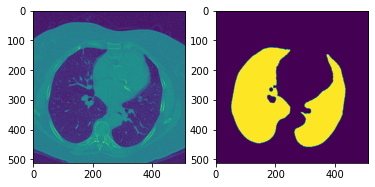

In [ ]:
%matplotlib inline
test_image=imread(all_images[100])
test_mask=imread(all_masks[100])
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(test_image)
ax2.imshow(test_mask)

In [ ]:
type(test_image)

numpy.ndarray

In [ ]:
test_image.shape

(512, 512)

In [ ]:
# https://youtu.be/J_XSd_u_Yew

"""
@author: Sreenivas Bhattiprolu
Segmentation MOdels library info:
#https://github.com/qubvel/segmentation_models
#Recommended for colab execution
TensorFlow ==2.1.0
keras ==2.3.1
pip install segmentation-models
For this demo it is working on a local workstation...
Python 3.5
TensorFlow ==1.
keras ==2
Data set link: http://brainiac2.mit.edu/isbi_challenge/home
"""

'\n@author: Sreenivas Bhattiprolu\nSegmentation MOdels library info:\n#https://github.com/qubvel/segmentation_models\n#Recommended for colab execution\nTensorFlow ==2.1.0\nkeras ==2.3.1\npip install segmentation-models\nFor this demo it is working on a local workstation...\nPython 3.5\nTensorFlow ==1.\nkeras ==2\nData set link: http://brainiac2.mit.edu/isbi_challenge/home\n'

In [ ]:
BASE_IMG_PATH

'../input/finding-lungs-in-ct-data/'

In [ ]:
all_images[:1]

['../input/finding-lungs-in-ct-data/2d_images/ID_0055_Z_0122.tif']

In [ ]:
import tensorflow as tf
import segmentation_models as sm
import glob
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)


#Resizing images is optional, CNNs are ok with large images
SIZE_X = 256 #Resize images (height  = X, width = Y)
SIZE_Y = 256

In [ ]:
#Capture training image info as a list
train_images = []

#kaggle/input/finding-lungs-in-ct-data/2d_images/
#for directory_path in glob.glob("membrane/augmented_train_256/aug_img"):
#for img_path in glob.glob(os.path.join(directory_path, "*.png")):

for img_path in all_images:    
    #print(img_path)
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
    #img = cv2.resize(img, (SIZE_Y, SIZE_X))
    #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    train_images.append(img)
    #train_labels.append(label)
#Convert list to array for machine learning processing        
train_images = np.array(train_images)
train_images.shape

(267, 512, 512, 3)

In [ ]:
#Capture mask/label info as a list
train_masks = [] 
#for directory_path in glob.glob("membrane/augmented_train_256/aug_mask"):
#    for mask_path in glob.glob(os.path.join(directory_path, "*.png")):
for mask_path in all_masks:
    mask = cv2.imread(mask_path, 0)       
    #mask = cv2.resize(mask, (SIZE_Y, SIZE_X))
    #mask = cv2.cvtColor(mask, cv2.COLOR_RGB2BGR)
    train_masks.append(mask)
#train_labels.append(label)
#Convert list to array for machine learning processing          
train_masks = np.array(train_masks)
train_masks.shape

(267, 512, 512)

In [ ]:
#Use customary x_train and y_train variables
X = train_images
Y = train_masks
Y = np.expand_dims(Y, axis=3) #May not be necessary.. leftover from previous code 


from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# preprocess input
x_train = preprocess_input(x_train)
x_val = preprocess_input(x_val)

In [ ]:
# define model
model = sm.Unet(BACKBONE, encoder_weights='imagenet')
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse'])

print(model.summary())

85524480/85521592 [==============================] - 1s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, None, None,  0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, None, None, 3 9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, None, None, 3 0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, None, None, 6 9408        zero_padding2d[0][0]             
___________________________

In [ ]:
history=model.fit(x_train, 
          y_train,
          batch_size=8, 
          epochs=10,
          verbose=1,
          validation_data=(x_val, y_val))

Train on 213 samples, validate on 54 samples
Epoch 1/10
213/213 [==============================] - 935s 4s/sample - loss: -364.6757 - mse: 15100.9004 - val_loss: -14830.4645 - val_mse: 15513.8633
Epoch 2/10
213/213 [==============================] - 968s 5s/sample - loss: -822.0932 - mse: 15095.6787 - val_loss: -1653.6016 - val_mse: 15514.6650
Epoch 3/10
213/213 [==============================] - 970s 5s/sample - loss: -1313.8482 - mse: 15095.5039 - val_loss: -1974.5838 - val_mse: 15513.5010
Epoch 4/10
213/213 [==============================] - 944s 4s/sample - loss: -1880.4548 - mse: 15095.6855 - val_loss: -3150.9552 - val_mse: 15513.1328
Epoch 5/10
213/213 [==============================] - 922s 4s/sample - loss: -2551.0081 - mse: 15095.5977 - val_loss: -1756.6031 - val_mse: 15527.3711
Epoch 6/10
213/213 [==============================] - 940s 4s/sample - loss: -3281.2219 - mse: 15095.4258 - val_loss: -5752.3624 - val_mse: 15515.3857
Epoch 7/10
213/213 [==============================

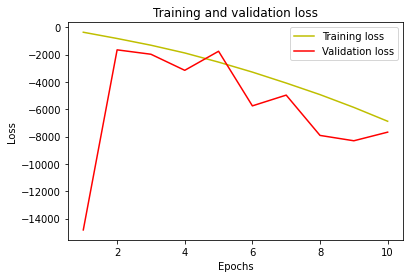

In [ ]:
#accuracy = model.evaluate(x_val, y_val)
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.save('lung-segmentation.h5')
from tensorflow import keras
model = keras.models.load_model('lung-segmentation.h5', compile=False)

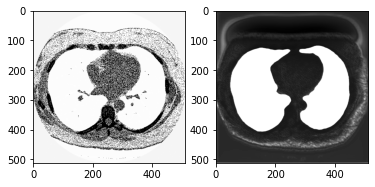

In [ ]:
#Test on a different image
#../input/finding-lungs-in-ct-data/2d_images/ID_0055_Z_0122.tif
test_img = cv2.imread('../input/finding-lungs-in-ct-data/2d_images/ID_0055_Z_0122.tif', cv2.IMREAD_COLOR)   
#test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
test_img = np.expand_dims(test_img, axis=0)

prediction = model.predict(test_img)

#View and Save segmented image
prediction_image = prediction[0].reshape(mask.shape)

#plt.imsave('../output/ID_0055_Z_0122_mask.tif', prediction_image, cmap='gray')
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(test_img[0], cmap='gray')
ax2.imshow(prediction_image, cmap='gray')

In [ ]:
#Test on a different image
#READ EXTERNAL IMAGE...
#test_img = cv2.imread('membrane/test/0.png', cv2.IMREAD_COLOR)       
#../input/finding-lungs-in-ct-data/2d_images/ID_0055_Z_0122.tif
#test_img = cv2.imread('../input/finding-lungs-in-ct-data/2d_images/ID_0055_Z_0122.tif', cv2.IMREAD_COLOR)   
#test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
#test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
#test_img = np.expand_dims(test_img, axis=0)

#prediction = model.predict(test_img)

#View and Save segmented image
#prediction_image = prediction.reshape(mask.shape)
#plt.imshow(prediction_image, cmap='gray')
#plt.imsave('membrane/test0_segmented.jpg', prediction_image, cmap='gray')
#plt.imsave('../output/ID_0055_Z_0122_mask.tif', prediction_image, cmap='gray')

ValueError: cannot reshape array of size 65536 into shape (512,512)